# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#supressing warning messages
import warnings
warnings.filterwarnings('ignore')

# Reading the data into Python

In [4]:
CreditRisk=pd.read_csv("R:\DS\Ivy\Python\Python Datasets\Classification Datasets\creditRiskData.csv")
CreditRisk.head()

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [5]:
print('Shape of dataset:',CreditRisk.shape)
CreditRisk=CreditRisk.drop_duplicates()
print('Shape of dataset after removing duplicates:',CreditRisk.shape)

Shape of dataset: (1000, 21)
Shape of dataset after removing duplicates: (1000, 21)


*The data has no duplicate values*

# Defining the Problem Statement

**Target Variable:** GoodCredit

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is categorical.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Classification, make sure there is a balance in the the distribution of each class otherwise it impacts the Machine Learning algorithms ability to learn all the classes

<AxesSubplot:xlabel='GoodCredit', ylabel='count'>

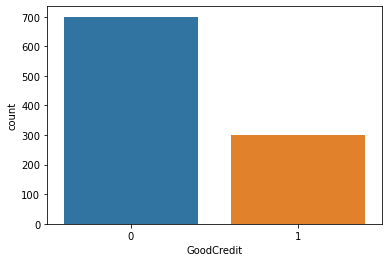

In [6]:
sns.countplot(CreditRisk['GoodCredit'])

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

In [7]:
CreditRisk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

In [8]:
CreditRisk.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

In [9]:
CreditRisk.describe()

,GoodCredit,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [10]:
CreditRisk.nunique()

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64

# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>GoodCredit</b>: Categorical. Selected. This is the <b>Target Variable!</b>
* <b>Checkingstatus</b>: Categorical. Selected.
* <b>duration</b>: Continuous. Selected.
* <b>history</b>: Categorical. Selected.
* <b>purpose</b>: Categorical. Selected.
* <b>amount</b>: Continuous. Selected.
* <b>savings</b>: Categorical. Selected.
* <b>employ</b>: Categorical. Selected.
* <b>installment</b>: Categorical. Selected.
* <b>status</b>: Categorical. Selected.
* <b>others</b>: Categorical. Selected.
* <b>residence</b>: Categorical. Selected.
* <b>property</b>: Categorical. Selected.
* <b>age</b>: Continuous. Selected.
* <b>other plans</b>: Categorical. Selected.
* <b>housing</b>: Categorical. Selected.
* <b>cards</b>: Categorical. Selected.
* <b>job</b>: Categorical. Selected.
* <b>liable</b>: Categorical. Selected.
* <b>tele</b>: Categorical. Selected.
* <b>foreign</b>: Categorical. Selected.

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

Categorical Predictors: 
'Checkingstatus','history','purpose','savings','employ','installment','status','others','residence','property','other plans','housing','cards','job','liable','foreign'

We use bar charts to see how the data is distributed for these categorical columns.

In [11]:
#defining a function for plotting catergorical variables

def Plot_CatCols(InpData,CatCols):
    # Generating multiple subplots
    fig,subplot=plt.subplots(nrows=1,ncols=len(CatCols),figsize=(25,7))
    
    for ColName,PlotNum in zip(CatCols,range(len(CatCols))):
        sns.countplot(data=CreditRisk,x=ColName, ax=subplot[PlotNum])

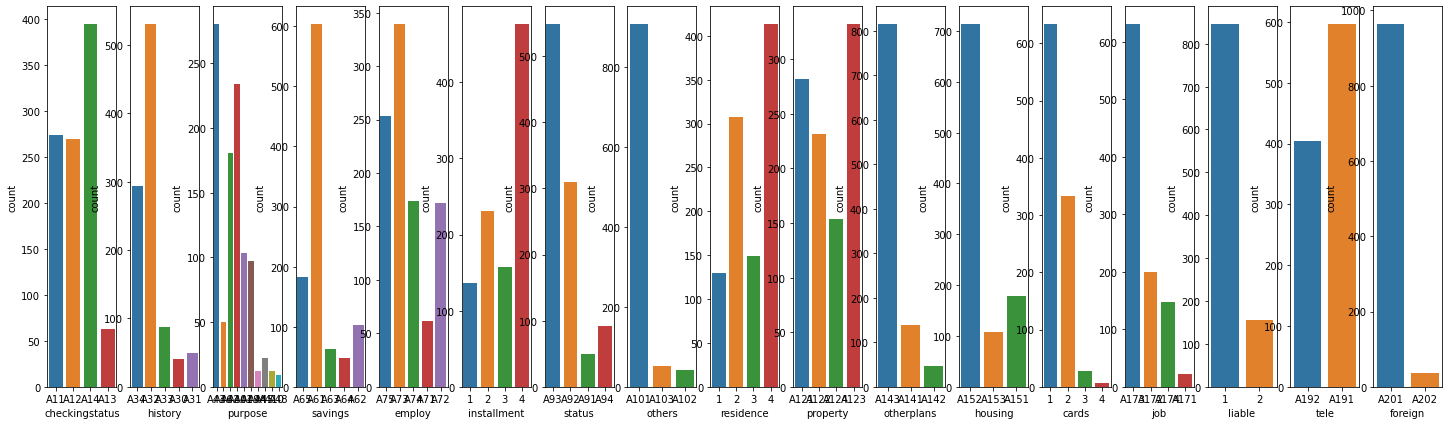

In [12]:
CatCols=['checkingstatus','history','purpose','savings','employ','installment','status','others','residence','property','otherplans','housing','cards','job','liable','tele','foreign']

Plot_CatCols(InpData=CreditRisk, CatCols=CatCols)

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

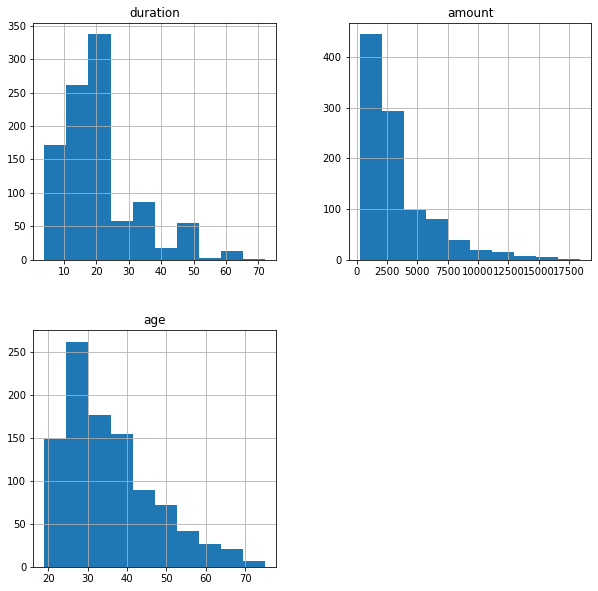

In [13]:
CreditRisk.hist(['duration','amount','age'],figsize=(10,10))

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

## Outlier Treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

The continuous variables are highly skewed, so outlier treatment is not required

# Feature Selection
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is categorical, hence below two scenarios will be present
* Categorical Target Variable Vs Continuous Predictor
* Categorical Target Variable Vs Categorical Predictor

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

In [14]:
ContCols=['duration','amount','age']

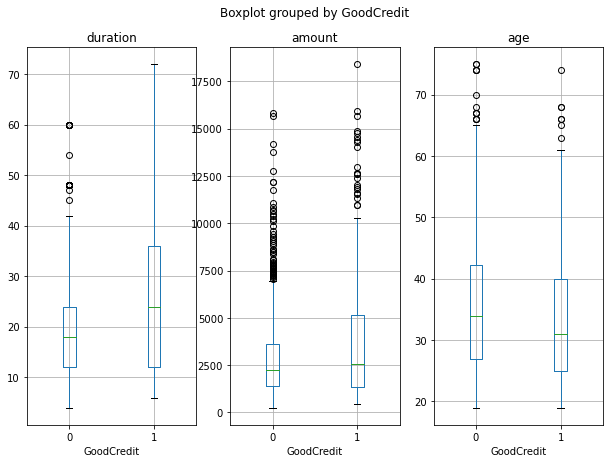

In [15]:
fig,subplot=plt.subplots(nrows=1, ncols=len(ContCols),figsize=(10,7))

for PredCol,PlotNum in zip(ContCols, range(len(ContCols))):
    CreditRisk.boxplot(by='GoodCredit',column=PredCol,ax=subplot[PlotNum])

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [16]:
from scipy.stats import f_oneway

In [17]:
def Func_Anova(InpData,TargetVariable,ContPred):
    # Creating an empty list of final selected predictors
    SelectedPreds=[]
    
    for pred in ContPred:
        ContColList=InpData.groupby(TargetVariable)[pred].apply(list)
        Anova=f_oneway(*ContColList) #unpacks the list
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if(Anova[1]<0.05):
            print(pred,'is correlated with',TargetVariable,' | P-value:', Anova[1])
            SelectedPreds.append(pred)
        else:
            print(pred,'is NOT correlated with',TargetVariable,' | P-value:', Anova[1])
    return(SelectedPreds)

In [18]:
Func_Anova(InpData=CreditRisk,TargetVariable='GoodCredit',ContPred=ContCols)

duration is correlated with GoodCredit  | P-value: 6.488049877187189e-12
amount is correlated with GoodCredit  | P-value: 8.797572373533373e-07
age is correlated with GoodCredit  | P-value: 0.003925339398278295


['duration', 'amount', 'age']

**Selected Columns:** ['duration', 'amount', 'age']

# Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them  visually using barplots and statistically using Chi-square test

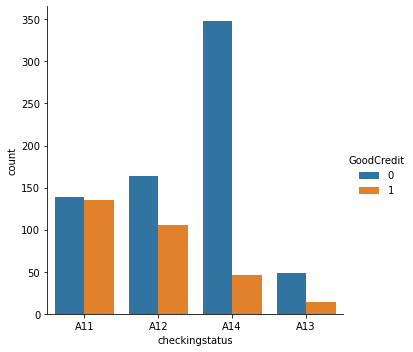

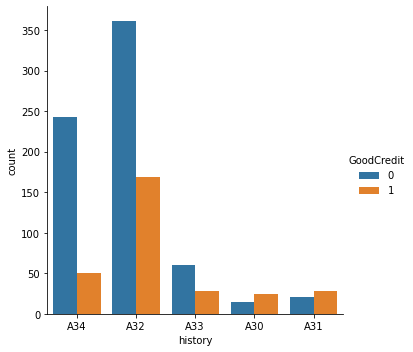

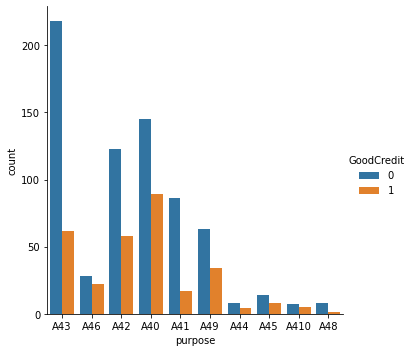

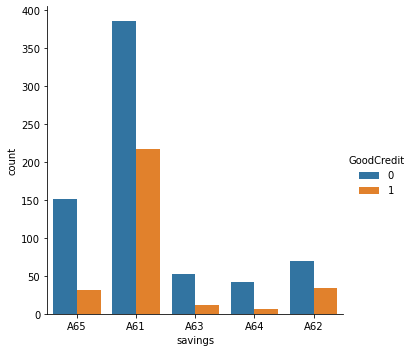

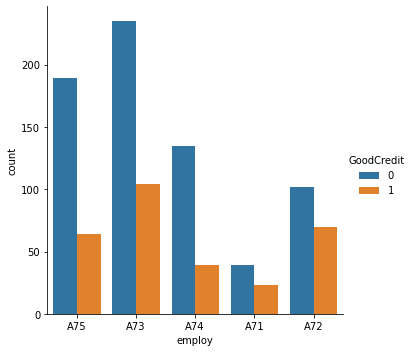

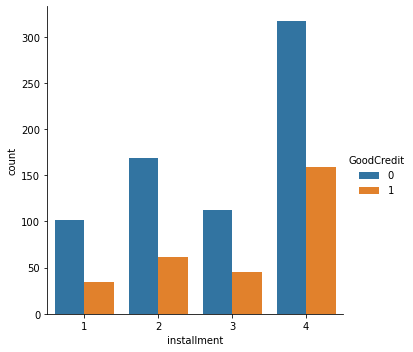

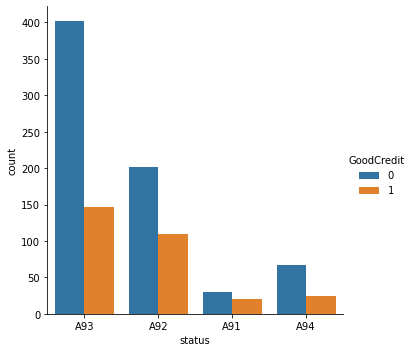

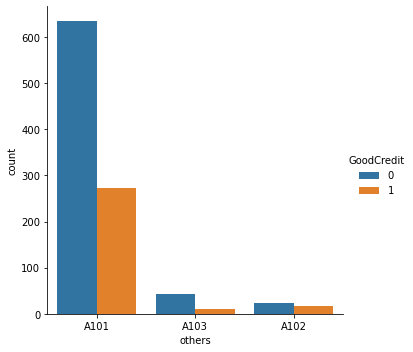

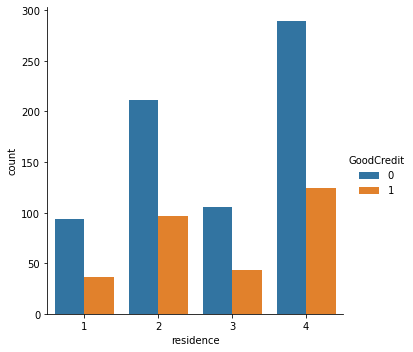

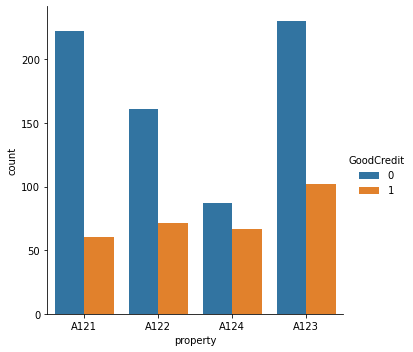

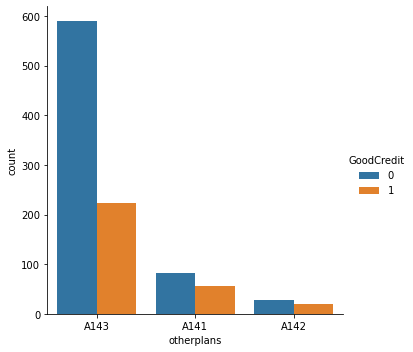

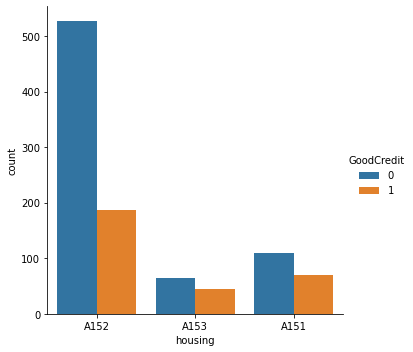

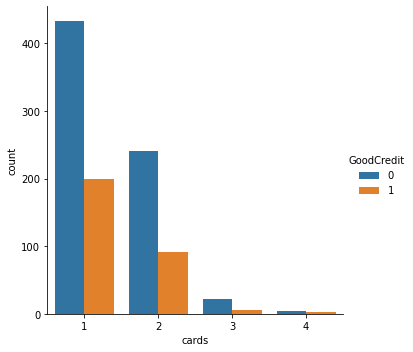

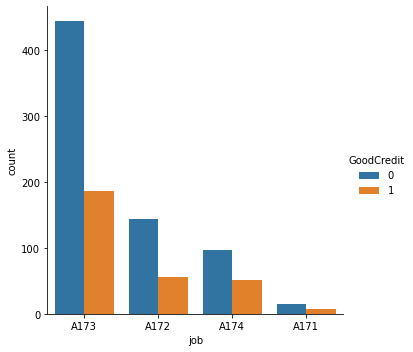

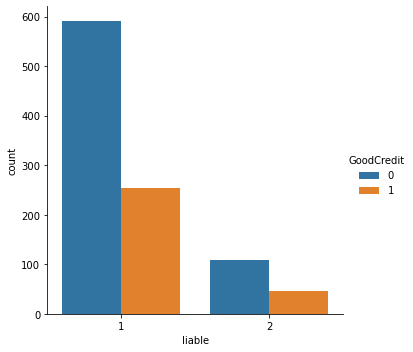

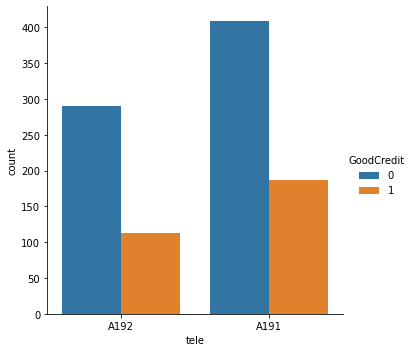

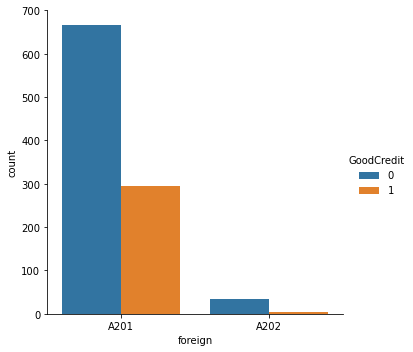

In [19]:
for pred,PlotNum in zip(CatCols, range(len(CatCols))):
    sns.catplot(data=CreditRisk,x=pred,hue='GoodCredit',kind='count')

# Grouped Bar charts Interpretation
<b>What to look for in these grouped bar charts?</b>

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. 
If the ratio of bars is similar across all categories, then the two columns are not correlated. 

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True

In [20]:
from scipy.stats import chi2_contingency

In [21]:
def FuncChi(InpData, TV,CatCols):
  
    # Creating an empty list of final selected predictors
    SelectedPreds=[]
    
    for pred in CatCols:
        CT=pd.crosstab(index=InpData[TV],columns=InpData[pred])
        Chi2=chi2_contingency(CT)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (Chi2[1]<0.05):
            print(pred, 'is correlated with', TV, ' | P-value:', Chi2[1])
            SelectedPreds.append(pred)
        else:
            print(pred, 'is NOT correlated with', TV, ' | P-value:', Chi2[1])
            
    return(SelectedPreds)

In [22]:
FuncChi(InpData=CreditRisk, TV='GoodCredit', CatCols=CatCols)

checkingstatus is correlated with GoodCredit  | P-value: 1.2189020722893755e-26
history is correlated with GoodCredit  | P-value: 1.2791872956751013e-12
purpose is correlated with GoodCredit  | P-value: 0.00011574910079691586
savings is correlated with GoodCredit  | P-value: 2.7612142385682596e-07
employ is correlated with GoodCredit  | P-value: 0.001045452349140254
installment is NOT correlated with GoodCredit  | P-value: 0.1400333122128481
status is correlated with GoodCredit  | P-value: 0.02223800546926877
others is correlated with GoodCredit  | P-value: 0.036055954027247226
residence is NOT correlated with GoodCredit  | P-value: 0.8615521320413175
property is correlated with GoodCredit  | P-value: 2.8584415733250017e-05
otherplans is correlated with GoodCredit  | P-value: 0.0016293178186473534
housing is correlated with GoodCredit  | P-value: 0.00011167465374597684
cards is NOT correlated with GoodCredit  | P-value: 0.4451440800083001
job is NOT correlated with GoodCredit  | P-valu

['checkingstatus',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'foreign']

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [59]:
SelectedCols=['duration', 'amount', 'age',
            'checkingstatus','history','purpose','savings','employ','status','others','property','otherplans',
            'housing','foreign']

In [61]:
# Selecting final columns
final_df=CreditRisk[SelectedCols]
final_df.head()

,duration,amount,age,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign
0,6,1169,67,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A201
1,48,5951,22,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A201
2,12,2096,49,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A201
3,42,7882,45,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A201
4,24,4870,53,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A201


## Data Pre-processing for Machine Learning

1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. 

Based on the information on the column values explanation from the data website

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

"employ" column has ordinal properties.

In [62]:
final_df['employ'].replace({'A71':1,'A72':2,'A73':3,'A74':4,'A75':5},inplace=True)
final_df.head()

,duration,amount,age,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign
0,6,1169,67,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,A201
1,48,5951,22,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,A201
2,12,2096,49,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,A201
3,42,7882,45,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,A201
4,24,4870,53,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,A201


## Converting the binary nominal variable to numeric using 1/0 mapping

In [63]:
final_df.nunique()

duration           33
amount            921
age                53
checkingstatus      4
history             5
purpose            10
savings             5
employ              5
status              4
others              3
property            4
otherplans          3
housing             3
foreign             2
dtype: int64

In [64]:
final_df['foreign'].replace({'A201':0,'A202':1},inplace=True)
final_df.head()

,duration,amount,age,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,foreign
0,6,1169,67,A11,A34,A43,A65,5,A93,A101,A121,A143,A152,0
1,48,5951,22,A12,A32,A43,A61,3,A92,A101,A121,A143,A152,0
2,12,2096,49,A14,A34,A46,A61,4,A93,A101,A121,A143,A152,0
3,42,7882,45,A11,A32,A42,A61,4,A93,A103,A122,A143,A153,0
4,24,4870,53,A11,A33,A40,A61,3,A93,A101,A124,A143,A153,0


## Converting the nominal variable to numeric using get_dummies()

In [65]:
# Treating all the nominal variables at once using dummy variables
final_df=pd.get_dummies(final_df)
final_df.head()

,duration,amount,age,employ,foreign,checkingstatus_A11,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A30,...,property_A121,property_A122,property_A123,property_A124,otherplans_A141,otherplans_A142,otherplans_A143,housing_A151,housing_A152,housing_A153
0,6,1169,67,5,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
1,48,5951,22,3,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,12,2096,49,4,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
3,42,7882,45,4,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4,24,4870,53,3,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [66]:
# Adding Target Variable to the data
final_df['GoodCredit']=CreditRisk['GoodCredit']

# Machine Learning: Splitting the data into Training and Testing sample

In [67]:
final_df.columns

Index(['duration', 'amount', 'age', 'employ', 'foreign', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153',
       'GoodCredit'],
      dtype='object')

In [68]:
TV='GoodCredit'
Predictors=['duration', 'amount', 'age', 'employ', 'foreign', 'checkingstatus_A11',
       'checkingstatus_A12', 'checkingstatus_A13', 'checkingstatus_A14',
       'history_A30', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A40', 'purpose_A41', 'purpose_A410',
       'purpose_A42', 'purpose_A43', 'purpose_A44', 'purpose_A45',
       'purpose_A46', 'purpose_A48', 'purpose_A49', 'savings_A61',
       'savings_A62', 'savings_A63', 'savings_A64', 'savings_A65',
       'status_A91', 'status_A92', 'status_A93', 'status_A94', 'others_A101',
       'others_A102', 'others_A103', 'property_A121', 'property_A122',
       'property_A123', 'property_A124', 'otherplans_A141', 'otherplans_A142',
       'otherplans_A143', 'housing_A151', 'housing_A152', 'housing_A153']

In [69]:
x=final_df[Predictors]
y=final_df[TV]

# Standardization/Normalization

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Storing the fit object for later reference
Scaler=MinMaxScaler().fit(x)
# Generating the standardized values of X
x=Scaler.transform(x)

In [34]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [35]:
# Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 46)
(700,)
(300, 46)
(300,)


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression(solver='newton-cg')

# Creating the model on Training Data
lm=lm.fit(x_train,y_train)
prediction=lm.predict(x_test)

# Model Evaluation

In [37]:
from sklearn import metrics

# Measuring accuracy on Testing Data
print("Classification report: \n", metrics.classification_report(prediction,y_test))
print("Confusion matrix: \n", metrics.confusion_matrix(prediction,y_test))

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       235
           1       0.52      0.69      0.59        65

    accuracy                           0.79       300
   macro avg       0.71      0.76      0.73       300
weighted avg       0.82      0.79      0.80       300

Confusion matrix: 
 [[193  42]
 [ 20  45]]


In [38]:
# Printing the Overall Accuracy of the model using F1 score
print("Average model accuracy:",round(metrics.f1_score(prediction,y_test,average="weighted"),2))

Average model accuracy: 0.8


In [39]:
from sklearn.model_selection import cross_val_score

# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy=cross_val_score(lm,x,y,cv=7,scoring="f1_weighted")
print("Final average accuracy of model:",round(Accuracy.mean(),2))

Final average accuracy of model: 0.74


# Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5,criterion='entropy').fit(x_train,y_train)
Prediction=dt.predict(x_test)

In [41]:
# Measuring accuracy on Testing Data
print("Classification report: \n",metrics.classification_report(Prediction,y_test))
print("Confusion matrix: \n",metrics.confusion_matrix(Prediction,y_test))

Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79       209
           1       0.51      0.48      0.49        91

    accuracy                           0.70       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.70      0.70      0.70       300

Confusion matrix: 
 [[166  43]
 [ 47  44]]


In [42]:
# Printing the Overall Accuracy of the model using F1 score
print("Average Accuracy of the model:", round(metrics.f1_score(Prediction,y_test,average="weighted"),2))

Average Accuracy of the model: 0.7


<AxesSubplot:>

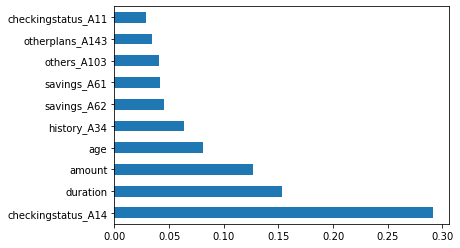

In [44]:
# Plotting the feature importance for Top 10 most important columns
features=pd.Series(dt.feature_importances_,index=Predictors)
features.nlargest(10).plot(kind='barh')

In [57]:
Accu_Score=cross_val_score(dt,x,y,cv=5,scoring='f1_weighted')
print("Final Average Accuracy of model:",round(Accu_Score.mean(),2))

Final Average Accuracy of model: 0.7


### Plotting a Decision Tree

In [47]:
import os
os.environ['PATH']+=os.pathsep+'C:\\Users\\eshvi\\anaconda3\\Library\\bin\\graphviz'

In [50]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [71]:
#Create DOT Data
dot_data=tree.export_graphviz(dt,out_file=None,feature_names=Predictors,class_names=y)



TypeError: can only concatenate str (not "numpy.int64") to str

In [74]:
# Create DOT data
dot_data=tree.export_graphviz(dt,out_file=None,feature_names=Predictors,class_names=y)

# Draw graph
graph=pydotplus.graph_from_dot_data(dot_data)

#Show graph
Image(graph.create_png(),width=7000,height=7000)

TypeError: can only concatenate str (not "numpy.int64") to str